### Intro

# Visualização de Dados

* 2023661492 - Augusto César Gontijo de Araújo
* 2023682910 - Débora Mello de Almeida
* 2022685177 - José Walter de Lima Mota
* 2023685120 - Vinícius do Pinho Barbosa

#### Requisitos do trabalho

* Entrega da URL com as visualizações para acesso
* Tempo adequado da apresentação - até 10 min
* Interatividade das visualizações
* Pelo menos uma visualização por participante do grupo
* Clareza na apresentação
* Apresentação de insights
* Atende aos fundamentos estudados

### Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import requests
import json

### Dataset

In [ ]:
df = pd.read_csv('processed_data.csv')
df

,Unnamed: 0,Timestamp,Estado,Consumo Residencial,Consumo Industrial,Populacao,PIB
0,0,abr. 2006,Rondônia,45.120,17.835,1562417,13054713344
1,1,mai. 2006,Rondônia,43.171,17.769,1562417,13054713344
2,2,jun. 2006,Rondônia,44.069,17.940,1562417,13054713344
3,3,jul. 2006,Rondônia,48.872,20.237,1562417,13054713344
4,4,ago. 2006,Rondônia,49.050,19.602,1562417,13054713344
...,...,...,...,...,...,...,...
5476,5476,ago. 2020,Distrito Federal,203.972,56.441,3055149,265847334003
5477,5477,set. 2020,Distrito Federal,202.745,56.663,3055149,265847334003
5478,5478,out. 2020,Distrito Federal,222.851,56.930,3055149,265847334003
5479,5479,nov. 2020,Distrito Federal,210.326,54.881,3055149,265847334003


In [ ]:
len(df['Estado'].unique())

27

In [ ]:
# ajustando tipos de dados

df['Consumo Residencial'] = df['Consumo Residencial'].str.replace('.', '').astype(float)
df['Consumo Industrial'] = df['Consumo Industrial'].str.replace('.', '').astype(float)

<ipython-input-176-f9b0363e01f2>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-176-f9b0363e01f2>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5481 non-null   int64  
 1   Timestamp            5481 non-null   object 
 2   Estado               5481 non-null   object 
 3   Consumo Residencial  5481 non-null   float64
 4   Consumo Industrial   5481 non-null   float64
 5   Populacao            5481 non-null   int64  
 6   PIB                  5481 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 299.9+ KB


### Data Engineering

In [ ]:
# renomeando as colunas
rename = {
  "Timestamp": "mes_ano",
  "Estado": "estado",
  "Consumo Residencial": "consumo_residencial_absoluto",
  "Consumo Industrial": "consumo_industrial_absoluto",
  "Populacao": "populacao_absoluta",
  "PIB": "pib_absoluto"
}

df = df.rename(columns=rename)

In [ ]:
# incluindo a coluna ano
df['ano'] = df['mes_ano'].str[-4:] 

In [ ]:
# agrupando por ano e estado
dfg = df.groupby(['ano', 'estado']).agg({'consumo_residencial_absoluto': 'sum', 
                                           'consumo_industrial_absoluto': 'sum', 
                                           'populacao_absoluta': 'mean',
                                           'pib_absoluto': 'mean'
                                           }
                                          ).reset_index()

In [ ]:
# Ordenando o df por ano e estado
dfg = dfg.sort_values(['estado', 'ano']).reset_index(drop=True)

In [ ]:
# adicionando colunas per capita

dfg['consumo_residencial_per_capita'] = dfg['consumo_residencial_absoluto'] / dfg['populacao_absoluta']
dfg['consumo_industrial_per_capita'] = dfg['consumo_industrial_absoluto'] / dfg['populacao_absoluta']
dfg['pib_per_capita'] = dfg['pib_absoluto'] / dfg['populacao_absoluta']

In [ ]:
# adicionando variação percentual referente ao ano anterior

dfg['populacao_absoluta_yoy'] = dfg.groupby('estado')['populacao_absoluta'].pct_change() * 100
dfg['consumo_residencial_absoluto_yoy'] = dfg.groupby('estado')['consumo_residencial_absoluto'].pct_change() * 100
dfg['consumo_industrial_absoluto_yoy'] = dfg.groupby('estado')['consumo_industrial_absoluto'].pct_change() * 100

In [ ]:
dfg['populacao_absoluta_yoy_acumulado'] = dfg.groupby('estado', group_keys=False)['populacao_absoluta'].apply(lambda x: round(x / x.iloc[0] - 1,3))
dfg['populacao_absoluta_yoy_acumulado'] *= 100

dfg['consumo_residencial_absoluto_yoy_acumulado'] = dfg.groupby('estado', group_keys=False)['consumo_residencial_absoluto'].apply(lambda x: round(x / x.iloc[0] - 1,3))
dfg['consumo_residencial_absoluto_yoy_acumulado'] *= 100

In [ ]:
dfg.query('estado == "Acre"')

,ano,estado,consumo_residencial_absoluto,consumo_industrial_absoluto,populacao_absoluta,pib_absoluto,consumo_residencial_per_capita,consumo_industrial_per_capita,pib_per_capita,populacao_absoluta_yoy_acumulado,consumo_residencial_absoluto_yoy_acumulado
0,2004,Acre,184637.0,24097.0,630328.0,3.784003e+09,0.292922,0.038229,6003.227804,0.0,0.0
1,2005,Acre,202651.0,25560.0,669736.0,4.300581e+09,0.302583,0.038164,6421.308204,6.3,9.8
2,2006,Acre,220479.0,26255.0,686652.0,4.661807e+09,0.321093,0.038236,6789.184264,8.9,19.4
3,2007,Acre,231106.0,30371.0,655385.0,5.458172e+09,0.352626,0.046341,8328.192090,4.0,25.2
4,2008,Acre,251867.0,32480.0,680073.0,6.410255e+09,0.370353,0.047760,9425.833225,7.9,36.4
5,2009,Acre,272035.0,33012.0,691132.0,7.407821e+09,0.393608,0.047765,10718.388680,9.6,47.3
6,2010,Acre,309742.0,35797.0,733559.0,8.342356e+09,0.422246,0.048799,11372.439740,16.4,67.8
7,2011,Acre,331917.0,37939.0,746386.0,8.949434e+09,0.444699,0.050830,11990.355872,18.4,79.8
8,2012,Acre,362017.0,43825.0,758786.0,1.013792e+10,0.477100,0.057757,13360.716599,20.4,96.1
9,2013,Acre,373115.0,37296.0,776463.0,1.147393e+10,0.480532,0.048033,14777.175688,23.2,102.1


In [ ]:
# adicionando lat e long das capitais dos estados

# Dicionário com as capitais e suas coordenadas
capitais = {
    'Acre': {'capital': 'Rio Branco', 'lat': -9.975377, 'long': -67.824897, 'regiao': 'Norte', 'sigla': 'AC'},
    'Alagoas': {'capital': 'Maceió', 'lat': -9.665227, 'long': -35.735008, 'regiao': 'Nordeste', 'sigla': 'AL'},
    'Amapá': {'capital': 'Macapá', 'lat': 0.035571, 'long': -51.060405, 'regiao': 'Norte', 'sigla': 'AP'},
    'Amazonas': {'capital': 'Manaus', 'lat': -3.119028, 'long': -60.021731, 'regiao': 'Norte', 'sigla': 'AM'},
    'Bahia': {'capital': 'Salvador', 'lat': -12.971598, 'long': -38.501548, 'regiao': 'Nordeste', 'sigla': 'BA'},
    'Ceará': {'capital': 'Fortaleza', 'lat': -3.71839, 'long': -38.543398, 'regiao': 'Nordeste', 'sigla': 'CE'},
    'Distrito Federal': {'capital': 'Brasília', 'lat': -15.794229, 'long': -47.882166, 'regiao': 'Centro-Oeste', 'sigla': 'DF'},
    'Espírito Santo': {'capital': 'Vitória', 'lat': -20.319639, 'long': -40.337316, 'regiao': 'Sudeste', 'sigla': 'ES'},
    'Goiás': {'capital': 'Goiânia', 'lat': -16.686898, 'long': -49.264794, 'regiao': 'Centro-Oeste', 'sigla': 'GO'},
    'Maranhão': {'capital': 'São Luís', 'lat': -2.53874, 'long': -44.282097, 'regiao': 'Nordeste', 'sigla': 'MA'},
    'Mato Grosso': {'capital': 'Cuiabá', 'lat': -15.601411, 'long': -56.097892, 'regiao': 'Centro-Oeste', 'sigla': 'MT'},
    'Mato Grosso do Sul': {'capital': 'Campo Grande', 'lat': -20.469522, 'long': -54.620827, 'regiao': 'Centro-Oeste', 'sigla': 'MS'},
    'Minas Gerais': {'capital': 'Belo Horizonte', 'lat': -19.916681, 'long': -43.934493, 'regiao': 'Sudeste', 'sigla': 'MG'},
    'Pará': {'capital': 'Belém', 'lat': -1.455754, 'long': -48.490179, 'regiao': 'Norte', 'sigla': 'PA'},
    'Paraíba': {'capital': 'João Pessoa', 'lat': -7.119495, 'long': -34.845011, 'regiao': 'Nordeste', 'sigla': 'PB'},
    'Paraná': {'capital': 'Curitiba', 'lat': -25.429596, 'long': -49.271272, 'regiao': 'Sul', 'sigla': 'PR'},
    'Pernambuco': {'capital': 'Recife', 'lat': -8.057838, 'long': -34.882896, 'regiao': 'Nordeste', 'sigla': 'PE'},
    'Piauí': {'capital': 'Teresina', 'lat': -5.08921, 'long': -42.801301, 'regiao': 'Nordeste', 'sigla': 'PI'},
    'Rio de Janeiro': {'capital': 'Rio de Janeiro', 'lat': -22.906847, 'long': -43.172896, 'regiao': 'Sudeste', 'sigla': 'RJ'},
    'Rio Grande do Norte': {'capital': 'Natal', 'lat': -5.779256, 'long': -35.200916, 'regiao': 'Nordeste', 'sigla': 'RN'},
    'Rio Grande do Sul': {'capital': 'Porto Alegre', 'lat': -30.031831, 'long': -51.206749, 'regiao': 'Sul', 'sigla': 'RS'},
    'Rondônia': {'capital': 'Porto Velho', 'lat': -8.76194, 'long': -63.903538, 'regiao': 'Norte', 'sigla': 'RO'},
    'Roraima': {'capital': 'Boa Vista', 'lat': 2.82351, 'long': -60.675833, 'regiao': 'Norte', 'sigla': 'RR'},
    'Santa Catarina': {'capital': 'Florianópolis', 'lat': -27.594987, 'long': -48.54821, 'regiao': 'Sul', 'sigla': 'SC'},
    'São Paulo': {'capital': 'São Paulo', 'lat': -23.55052, 'long': -46.633308, 'regiao': 'Sudeste', 'sigla': 'SP'},
    'Sergipe': {'capital': 'Aracaju', 'lat': -10.909294, 'long': -37.074763, 'regiao': 'Nordeste', 'sigla': 'SE'},
    'Tocantins': {'capital': 'Palmas', 'lat': -10.249091, 'long': -48.324293, 'regiao': 'Norte', 'sigla': 'TO'}
}

# Adicionando as colunas de latitude e longitude ao dataframe
dfg['lat'] = dfg['estado'].map(lambda estado: capitais[estado]['lat'])
dfg['long'] = dfg['estado'].map(lambda estado: capitais[estado]['long'])
dfg['regiao'] = dfg['estado'].map(lambda estado: capitais[estado]['regiao'])
dfg['sigla'] = dfg['estado'].map(lambda estado: capitais[estado]['sigla'])

In [ ]:
dfg

,ano,estado,consumo_residencial_absoluto,consumo_industrial_absoluto,populacao_absoluta,pib_absoluto,consumo_residencial_per_capita,consumo_industrial_per_capita,pib_per_capita,populacao_absoluta_yoy_acumulado,consumo_residencial_absoluto_yoy_acumulado,lat,long,regiao,sigla
0,2004,Acre,184637.0,24097.0,630328.0,3.784003e+09,0.292922,0.038229,6003.227804,0.0,0.0,-9.975377,-67.824897,Norte,AC
1,2005,Acre,202651.0,25560.0,669736.0,4.300581e+09,0.302583,0.038164,6421.308204,6.3,9.8,-9.975377,-67.824897,Norte,AC
2,2006,Acre,220479.0,26255.0,686652.0,4.661807e+09,0.321093,0.038236,6789.184264,8.9,19.4,-9.975377,-67.824897,Norte,AC
3,2007,Acre,231106.0,30371.0,655385.0,5.458172e+09,0.352626,0.046341,8328.192090,4.0,25.2,-9.975377,-67.824897,Norte,AC
4,2008,Acre,251867.0,32480.0,680073.0,6.410255e+09,0.370353,0.047760,9425.833225,7.9,36.4,-9.975377,-67.824897,Norte,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2016,Tocantins,913667.0,290044.0,1532902.0,3.158482e+10,0.596037,0.189212,20604.589330,21.4,183.2,-10.249091,-48.324293,Norte,TO
453,2017,Tocantins,937387.0,295576.0,1550194.0,3.410813e+10,0.604690,0.190670,22002.492582,22.8,190.6,-10.249091,-48.324293,Norte,TO
454,2018,Tocantins,964014.0,344634.0,1555229.0,3.566618e+10,0.619853,0.221597,22933.074856,23.2,198.8,-10.249091,-48.324293,Norte,TO
455,2019,Tocantins,1050335.0,324429.0,1572866.0,3.935594e+10,0.667784,0.206266,25021.801741,24.6,225.6,-10.249091,-48.324293,Norte,TO


### Análise Exploratória

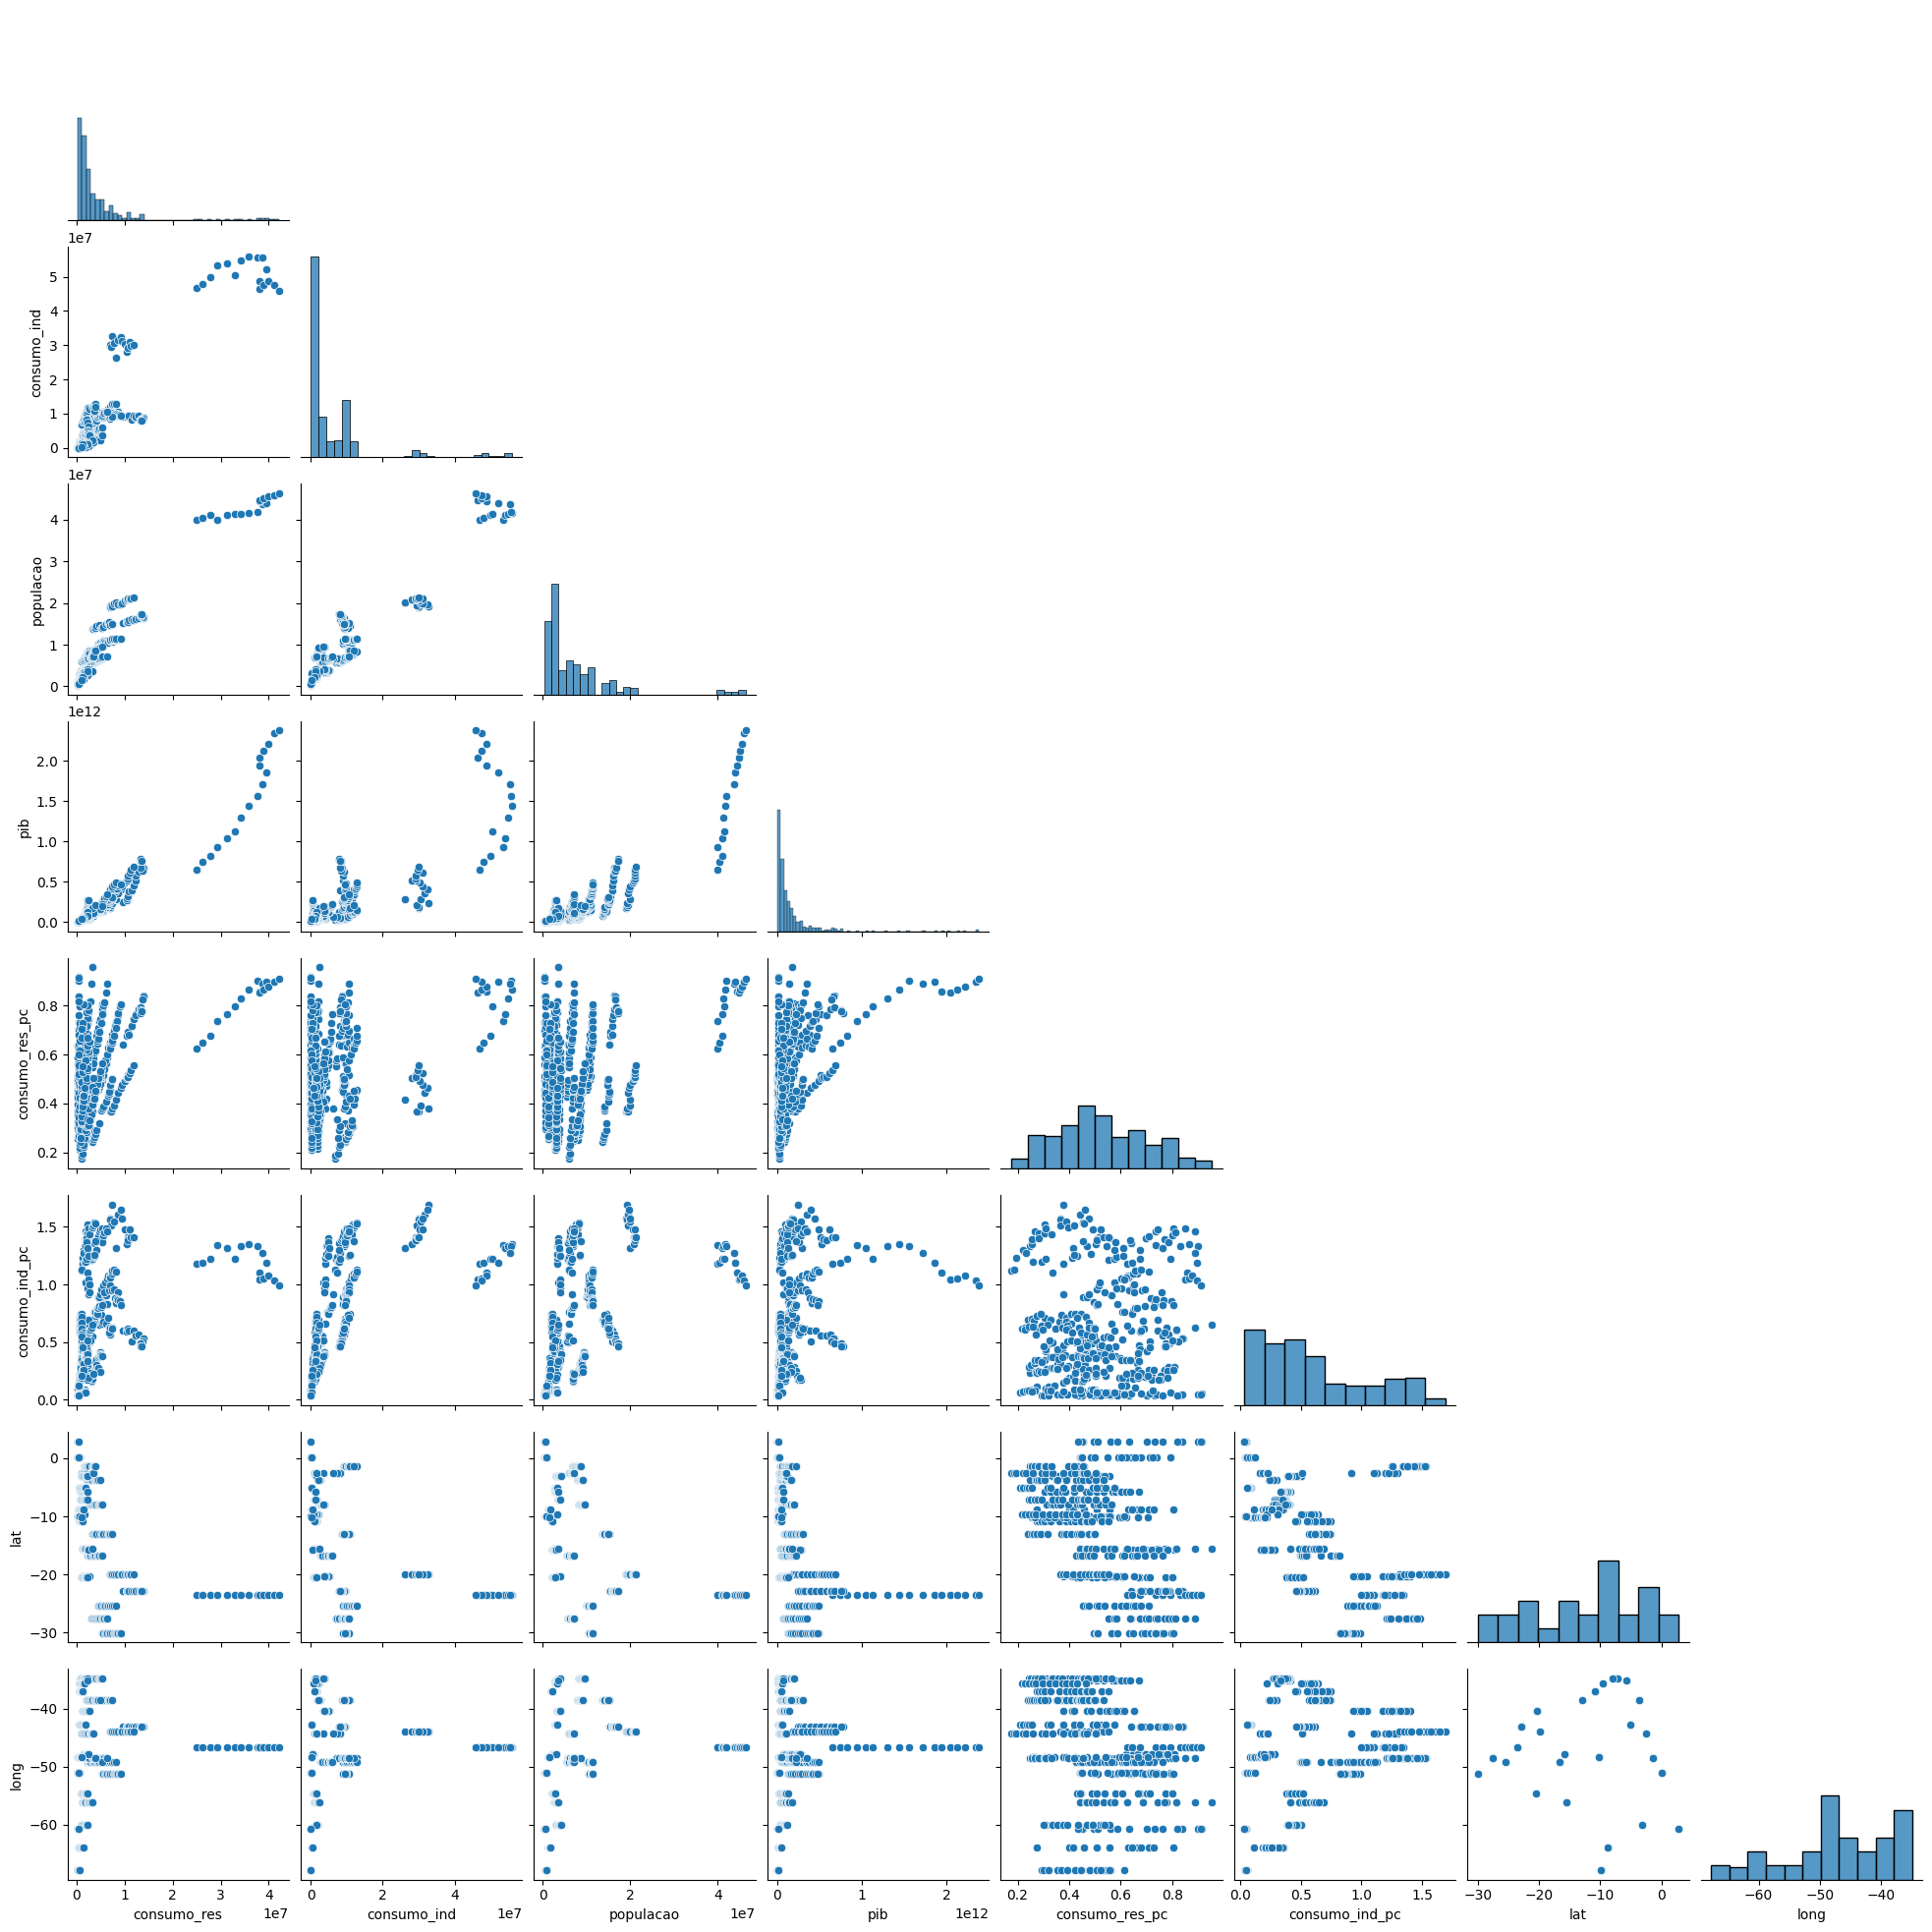

In [ ]:
sns.pairplot(dfg, corner=True)

<ipython-input-76-c8b278ab4cf9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_dfg.corr()


<Axes: >

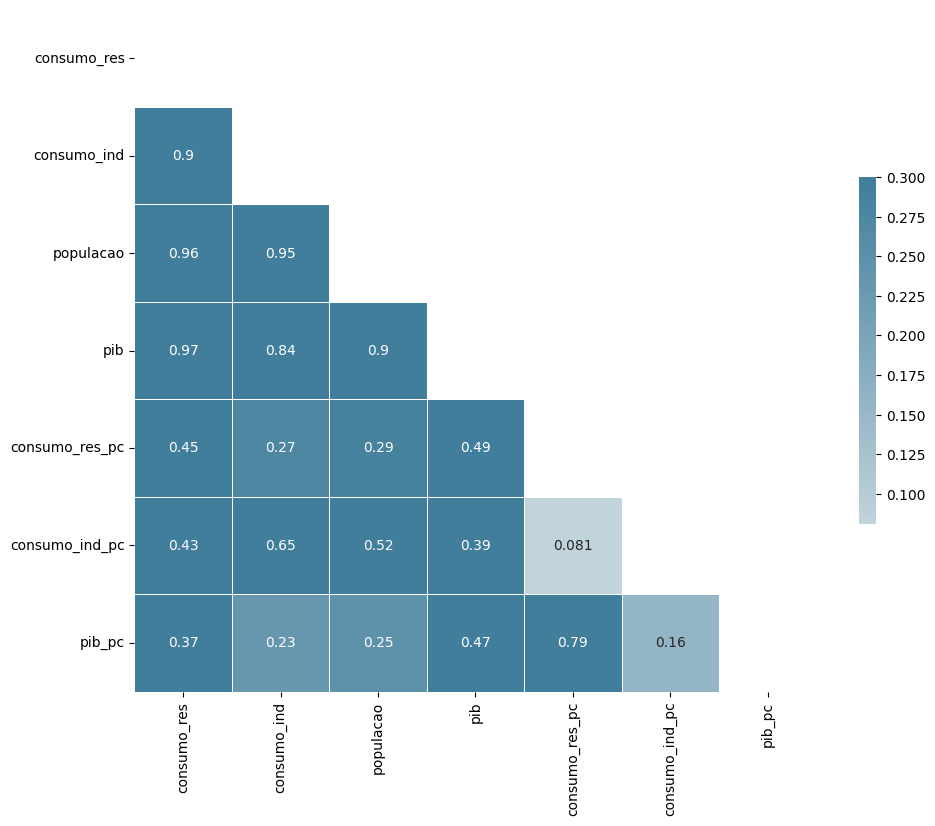

In [ ]:
corr_dfg = dfg.drop(columns= ['lat', 'long'])
corr = corr_dfg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Visualizações

In [ ]:
# Filtro de ano
# Filtro de dimensão (consumo, pib)

fig = px.treemap(dfg, path=['regiao', 'estado'], values='consumo_res')
fig.show()


In [ ]:
fig = px.line(dfg, 
              x='ano', 
              y='consumo_residencial_absoluto_yoy_acumulado', 
              color='estado',              
              title='Gráfico de Linhas')
fig.show()

In [ ]:
# Incluir Filtro da dimensão X
# Incluir Filtro da dimensão Y


fig = px.scatter(dfg, 
              x='consumo_res', 
              y='consumo_ind', 
              color='estado',
              animation_frame='ano',
              size="populacao",
              hover_name='estado',
              title='Gráfico de Linhas')
fig.show()

In [ ]:
# URL para pegar o GeoJSON das UF brasileiras
json_url = 'https://raw.githubusercontent.com/fititnt/gis-dataset-brasil/master/uf/geojson/uf.json'

# Enviando o request e salvando o Json
response = requests.get(json_url)
geojson = response.json()

In [ ]:
fig = px.choropleth_mapbox(dfg, geojson=geojson, 
                           color="populacao_absoluta",
                           #animation_frame="ano",
                           locations="sigla", 
                           featureidkey="properties.UF_05",
                           center={"lat": -15.75, "lon": -47.92},
                           mapbox_style="carto-positron", 
                           zoom=2.5)
fig.show()

Output hidden; open in https://colab.research.google.com to view.